In [1]:
from keras.datasets import mnist

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
single_image = X_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

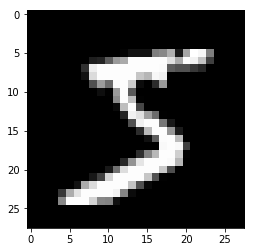

In [6]:
plt.imshow(single_image,cmap='gray')

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_train.shape

(60000,)

In [9]:
from keras.utils.np_utils import to_categorical
y_cat_train = to_categorical(y_train,10)
y_cat_test =  to_categorical(y_test,10)

In [10]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

In [12]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train,y_cat_train,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.0368 - acc: 0.9888
Epoch 2/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.0251 - acc: 0.9927
Epoch 3/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.0171 - acc: 0.9945
Epoch 4/5
60000/60000 [==============================] - 9s 147us/step - loss: 0.0121 - acc: 0.9964
Epoch 5/5
60000/60000 [==============================] - 9s 147us/step - loss: 0.0091 - acc: 0.9973


In [18]:
model.metrics_names

['loss', 'acc']

In [19]:
model.evaluate(X_test,y_cat_test)

10000/10000 [==============================] - 1s 61us/step


[0.07531582546881437, 0.9841]

In [20]:
from sklearn.metrics import classification_report
prediction = model.predict_classes(X_test)
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       1.00      0.99      0.99      1135
          2       0.99      0.97      0.98      1032
          3       0.99      0.99      0.99      1010
          4       0.98      0.99      0.99       982
          5       0.98      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.97      0.99      0.98      1028
          8       0.98      0.98      0.98       974
          9       0.98      0.97      0.98      1009

avg / total       0.98      0.98      0.98     10000

